<a href="https://colab.research.google.com/github/Nikhil468/Projects/blob/master/Variational%20Autoencoder%20for%20MNIST%20Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



In [59]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

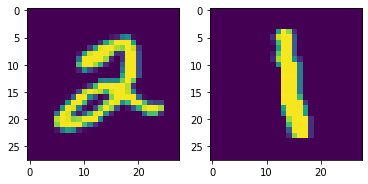

In [60]:
plt.subplot(1,2,1)
plt.imshow(x_train[5])
plt.subplot(1,2,2)
plt.imshow(x_train[6])

In [61]:
print(x_train[0,:,:,0])

IndexError: ignored

In [66]:
x_train=np.expand_dims(x_train,-1)

x_train = x_train/255.0

In [67]:
'''def kl_reconstruction_loss(mu, sigma):
  """ Computes the Kullback-Leibler Divergence (KLD)
  Args:
    inputs -- batch from the dataset
    outputs -- output of the Sampling layer
    mu -- mean
    sigma -- standard deviation

  Returns:
    KLD loss
  """
  kl_loss = 1 + sigma - tf.square(mu) - tf.math.exp(sigma)
  kl_loss = tf.reduce_mean(kl_loss) * -0.5

  return kl_loss'''
def kl_reconstruction_loss(z_mean, z_log_var):

  kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
  kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  return tf.keras.backend.mean(kl_loss)

In [68]:

def encoder_layers(inputs):

    #model=tf.keras.layers.Input(shape=x_train[0].shape)
    x=tf.keras.layers.Conv2D(64,3,strides=2,padding="same",activation="relu",name="1st-Conv2D")(inputs)
    #x=tf.keras.layers.BatchNormalization()(x)
    #x=tf.keras.layers.Dropout(0.4)(x)

    x=tf.keras.layers.Conv2D(32,3,strides=2,padding="same",activation="relu",name="2nd-Conv2D")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.4)(x)

    #x=tf.keras.layers.Conv2D(32,2,strides=2,activation="relu",name="3rd-Conv2D")(x)
    #x=tf.keras.layers.BatchNormalization()(x)
    conv_shape=x.shape
    #x=tf.keras.layers.Dropout(0.4)(x)

    flattened=tf.keras.layers.Flatten()(x)

    flattened=tf.keras.layers.Dense(100,activation="relu")(flattened)
    flattened = tf.keras.layers.BatchNormalization()(flattened)


    mu=tf.keras.layers.Dense(3,name="latent-mu")(flattened)
    sigma=tf.keras.layers.Dense(3,name="latent-sigma")(flattened)
    z = tf.keras.layers.Lambda(sampling, output_shape=(3,), name='z')([mu, sigma])

    encoder=tf.keras.models.Model(inputs=inputs,outputs=[mu,sigma,z])



    return encoder,conv_shape

In [69]:
def decoder_model(inputs,conv_shape):
    layers=tf.keras.layers.Dense(conv_shape[1]*conv_shape[2]*conv_shape[3],activation="relu",name="1st-after-encoder")(inputs)
    #layers = tf.keras.layers.BatchNormalization()(layers)

    layers=tf.keras.layers.Reshape(target_shape=(conv_shape[1],conv_shape[2],conv_shape[3]))(layers)

    layers=tf.keras.layers.Conv2DTranspose(32,3,strides=2,activation="relu")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)

    layers=tf.keras.layers.Conv2DTranspose(16,3,strides=2,activation="relu")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)
    
    layers=tf.keras.layers.Conv2DTranspose(8,3,strides=1,activation="relu")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)

   

    layers=tf.keras.layers.Conv2DTranspose(1,3,strides=1,activation="sigmoid")(layers)
    #layers.tf.keras.layers.BatchNormalisation()(layers)

    return layers


In [70]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = tf.keras.backend.shape(z_mean)[0]
    dim = tf.keras.backend.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon


In [71]:
def encoder_model(inputs):
    #inputs=tf.keras.layers.Input(shape=(28,28,1,))

    encoder,conv_shape=encoder_layers(inputs)
    #z=Sampling()([mu,sigma])

    #layers=encoder_layers(inputs,latent_dim)


    #print(encoder.summary())

    return encoder,conv_shape


In [72]:
def vae():

    lay=tf.keras.layers.Input(shape=(28,28,1,))

    encode,conv_shape=encoder_model(lay)

    #mu,sigma,z=encode(inputs)


    #abc=tf.keras,layers.Dense(100,activation="relu")
   
    x=tf.keras.layers.Input(shape=(3,))
    layers=tf.keras.layers.Dense(conv_shape[1]*conv_shape[2]*conv_shape[3],activation="relu",name="1st-after-encoder")(x)
    #layers = tf.keras.layers.BatchNormalization()(layers)

    layers=tf.keras.layers.Reshape(target_shape=(conv_shape[1],conv_shape[2],conv_shape[3]))(layers)

    layers=tf.keras.layers.Conv2DTranspose(64,3,strides=2,padding="same",activation="relu")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)

    layers=tf.keras.layers.Conv2DTranspose(16,3,strides=2,padding="same",activation="relu")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)

    #layers=tf.keras.layers.Conv2DTranspose(4,2,strides=2,padding="valid",activation="relu")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)
    
    #layers=tf.keras.layers.Conv2DTranspose(1,2,strides=2,activation="sigmoid")(layers)
    #layers=tf.keras.layers.BatchNormalization()(layers)

    layers=tf.keras.layers.Conv2DTranspose(1,3,strides=1,padding="same",activation="sigmoid")(layers)
    #layers.tf.keras.layers.BatchNormalisation()(layers)
    decoder=tf.keras.Model(inputs=x,outputs=layers)


    dec_out = decoder(encode.outputs[2]) 
    # Defining an end-to-end model with encoder inputs and decoder outputs
    model = tf.keras.Model(inputs=encode.inputs, outputs=dec_out)
    
    #model = tf.keras.Model(inputs=lay, outputs=layers)
    model.compile(loss="binary_crossentropy", optimizer='adam')
    loss = kl_reconstruction_loss(encode.outputs[0], encode.outputs[1])
    
    model.add_loss(0.0001*loss)
    print(model.summary())
    return model


In [73]:

model=vae()

print(model.summary())

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
1st-Conv2D (Conv2D)             (None, 14, 14, 64)   640         input_9[0][0]                    
__________________________________________________________________________________________________
2nd-Conv2D (Conv2D)             (None, 7, 7, 32)     18464       1st-Conv2D[0][0]                 
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 7, 7, 32)     128         2nd-Conv2D[0][0]                 
___________________________________________________________________________________________

In [74]:
print(x_train.shape)

(60000, 28, 28, 1)


In [102]:
model.fit(x_train[0:60000,:,:,:], x_train[0:60000,:,:,:],epochs=10,batch_size=128,shuffle=True)

Epoch 1/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1667
Epoch 2/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1662
Epoch 3/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1665
Epoch 4/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1659
Epoch 5/10
 28/469 [>.............................] - ETA: 1:08 - loss: 0.1669

KeyboardInterrupt: ignored

In [76]:
 x_test=x_test/255.0

In [77]:


x_test=np.expand_dims(x_test,-1)


In [85]:

x=model.predict(x_test)


In [81]:
print(x_test.shape)

(10000, 28, 28, 1)


In [ ]:
model.save_weights("MNIST_2_DIMS_BEST")

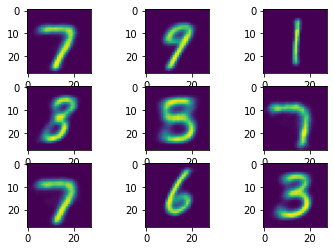

In [86]:
plt.subplot(331).imshow(x[0,:,:,0])
plt.subplot(332).imshow(x[20,:,:,0])
plt.subplot(333).imshow(x[40,:,:,0])


plt.subplot(334).imshow(x[110,:,:,0])
plt.subplot(335).imshow(x[120,:,:,0])
plt.subplot(336).imshow(x[60,:,:,0])

plt.subplot(337).imshow(x[70,:,:,0])
plt.subplot(338).imshow(x[50,:,:,0])
plt.subplot(339).imshow(x[90,:,:,0])

plt.show()

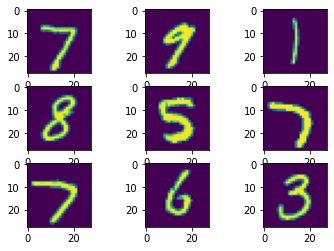

In [17]:
plt.subplot(331).imshow(x_test[0,:,:,0])
plt.subplot(332).imshow(x_test[20,:,:,0])
plt.subplot(333).imshow(x_test[40,:,:,0])

plt.subplot(334).imshow(x_test[110,:,:,0])
plt.subplot(335).imshow(x_test[120,:,:,0])
plt.subplot(336).imshow(x_test[60,:,:,0])

plt.subplot(337).imshow(x_test[70,:,:,0])
plt.subplot(338).imshow(x_test[50,:,:,0])
plt.subplot(339).imshow(x_test[90,:,:,0])

plt.show()

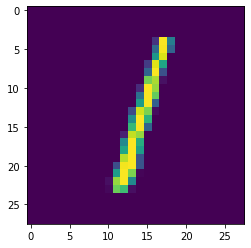

In [ ]:
1plt.imshow(x_test[2,:,:,0])


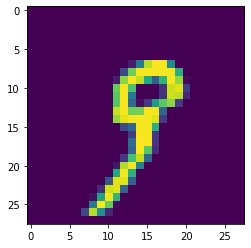

In [ ]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(x_train[19]))



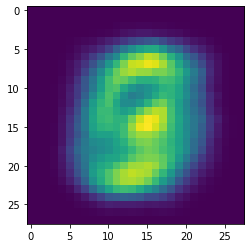

In [ ]:
x=model.predict(x_train[100:101,:,:,:])
plt.imshow(tf.keras.preprocessing.image.array_to_img(x[0]))



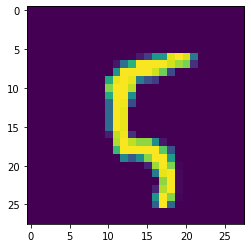

In [ ]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(x_train[100]))

In [ ]:
model.save_weights("MNIST_Weights_")

In [ ]:
d=model.evaluate(x_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0000e+00


In [ ]:
print(d)

0.0


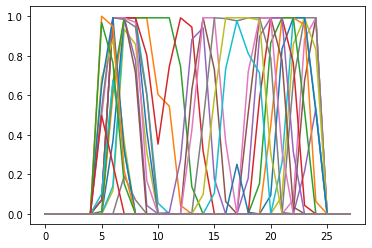

In [ ]:
plt.plot(x_train[0,:,:,0])

In [87]:
d=model.layers[10].output

In [88]:
print(d)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='z/add:0', description="created by layer 'z'")


In [89]:
m = tf.keras.Model(inputs=model.input, outputs=d)

In [90]:
results=m.predict(x_test)

ValueError: ignored

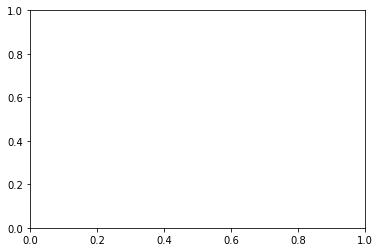

In [27]:
plt.scatter(np.arange(0,10000),results)

In [96]:
print(results.shape)

(10000, 3)


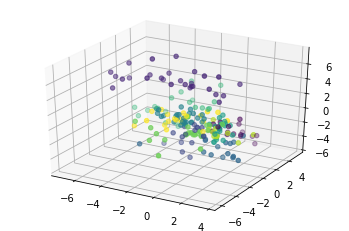

In [107]:

plt.subplot(111,projection='3d').scatter(results[:200,0],results[:200,1],results[:200,2],c=list(y_test[:200]))

plt.show()